In [9]:
!pip install --upgrade multion -q

In [2]:
import multion


In [3]:
multion.login()

Already logged in.


In [4]:
response = multion.set_remote(False)
response

False

In [5]:
response = multion.new_session({"input": "what is the weather today","url": "https://www.google.com"})
print(response['message'])
tabId = response['tabId']
tabId

running new session
I am typing "weather today" into the Google search bar and submitting the query to find the current weather.




'1371728138'

In [6]:
response = multion.update_session(tabId, {"input": "what is the weather today","url": "https://www.google.com"})
response['message']

session updated


'The weather today in West Menlo Park, CA 94025 is partly cloudy with a temperature of 23°C. There is a 20% chance of precipitation, the humidity is at 63%, and the wind speed is 16 km/h.\n\n'

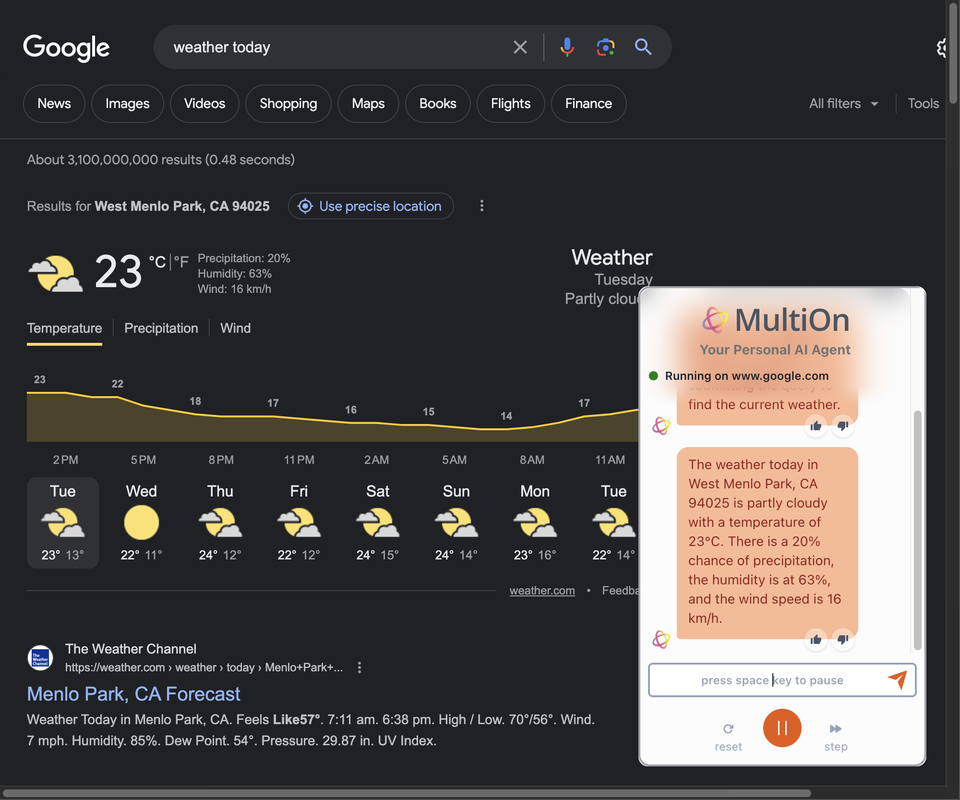

In [7]:
multion.get_screenshot(response, height=800)

In [8]:
multion.close_session(tabId)

{'request_id': '902cc35e-4648-4f90-aa6b-264dd765023f',
 'data': {'data': 'Session terminated'}}